# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# # Attempting multi-core processing
# import ipyparallel as ipp
# rc = ipp.Client()
# with rc[:].sync_imports():
#     import bs_ds.bs_ds as bs
#     import bs_ds.bamboo as bb

In [2]:
# rc.ids
# dview=rc[:]

# OSEMN Model
1. **OBTAIN:**
    - **Import data, inspect, check for datatypes to convert and null values**<br>
        - Display header and info
        - Drop any unneeded columns (df.drop(['col1','col2'],axis=1)

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
        - [x] Check for #'s that are store as objects (df.info())
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted
            - Decide how to deal weird/null values (df.unique(), df.isna().sum(), df.describe()-min/max, etc
        - [x]  Check for categorical variables stored as integers
    - [x] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [x] Check for multicollinearity
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and dat transformations to perform
        - Can also do kernel density estimates
    - [ ] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
        - categoricals will look like vertical lines
    - [ ] Use pd.plotting.scatter_matrix to visualize possible relationships
    - [ ] Check for linearity

   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

In [3]:
from bs_ds.bamboo import *
# import bs_ds as bs

View our documentation at https://bs-ds.readthedocs.io/en/latest/bs_ds.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



In [4]:
big_pandas()
ignore_warnings()

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.precision=4


# Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

**From Kaggle Listing:**
>For recidivism prediction the full dataset containing 26021 records was used. The name of the data set is: "3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated". All the variables related to recidivism were excluded from the dataset, except the response variable: 'Recidivism - return to prison'. The response variable was turned into a numeric vector of (0,1), where 1 means 'yes recidivism' and 0 means 'no recidivism'. 
Other variables related to recidivism were of course not used in the predictive analysis. There are 26021 records in this dataset.

> Another dataset was constructed using the initial one. This dataset is called 'prison_recidivists_with_recidivism_type_only'. It contains the records of those recidivists from the initial file for whom the type of recidivism has been recorded and documented.

> This one done in order to enable the comparison between the seriousness of the initial offense and the type of recidivism. Therefore, only the records containing both types were left in this dataset, and the rest were filtered out. The second dataset containing data recidivists only is comprised of 6718 records.

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/districtmap09122014.jpg" width=800>

### **The variables in the data set:**

- Fiscal Year Released Fiscal year (year ending June 30) for which the offender was released from prison.

- Recidivism Reporting Year 
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- Race - Ethnicity 
    - Offender's Race and Ethnicity

- Convicting Offense Classification 
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- Convicting Offense Type General category for the most serious offense for which the offender was placed in prison.

- Convicting Offense Subtype 
    - Further classification of the most serious offense for which the offender was placed in prison.

- Release Type 
    - Reasoning for Offender's release from prison.

- Main Supervising District 
    - The Judicial District supervising the offender for the longest time during the tracking period.

- Recidivism - Return to Prison 
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period

- Days to Recidivism 
    - Number of days it took before the offender returned to prison.

- New Conviction Offense Classification The same as the initial offense classification.

- New Conviction Offense Type The same as the initial offense type.

- New Conviction Offense Sub Type The same as the initial offense subtype.

- Part of Target Population 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

In [5]:
# Importing custom-library of functions.
# from bs_ds.bamboo import *
import bs_ds
from bs_ds.imports import *

,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


## Loading in the Dataset

In [6]:
# Dataset Links
mike_csv ='3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv'
# all_prisoners_url = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv'
all_prisoners_file = "datasets/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv"
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_url = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/dataset/prison_recidivists_with_recidivism_type_only.csv"
only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [7]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(mike_csv)

In [8]:
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
Fiscal Year Released                     26020 non-null int64
Recidivism Reporting Year                26020 non-null int64
Race - Ethnicity                         25990 non-null object
Age At Release                           26017 non-null object
Convicting Offense Classification        26020 non-null object
Convicting Offense Type                  26020 non-null object
Convicting Offense Subtype               26020 non-null object
Release Type                             24258 non-null object
Main Supervising District                16439 non-null object
Recidivism - Return to Prison            26020 non-null object
Days to Recidivism                       8681 non-null float64
New Conviction Offense Classification    6718 non-null object
New Conviction Offense Type              6718 non-null object
New Conviction Offense Sub Type          6699 non-null object
Part of Target

None

,Fiscal Year Released,Recidivism Reporting Year,Days to Recidivism
count,26020.0000,26020.0000,8681.0000
mean,2012.6008,2015.6008,469.9315
std,1.6610,1.6610,282.3034
min,2010.0000,2013.0000,0.0000
25%,2011.0000,2014.0000,238.0000
50%,2013.0000,2016.0000,418.0000
75%,2014.0000,2017.0000,682.0000
max,2015.0000,2018.0000,1095.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:


,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
Fiscal Year Released,0,26020,0.000
Recidivism Reporting Year,0,26020,0.000
Race - Ethnicity,30,26020,0.115
Age At Release,3,26020,0.012
Convicting Offense Classification,0,26020,0.000
Convicting Offense Type,0,26020,0.000
Convicting Offense Subtype,0,26020,0.000
Release Type,1762,26020,6.772
Main Supervising District,9581,26020,36.822


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type,Part of Target Population,Recidivism Type,Sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,433.0,C Felony,Drug,Trafficking,Yes,New,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,453.0,NaN,NaN,NaN,No,Tech,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,832.0,NaN,NaN,NaN,Yes,Tech,Male


**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [9]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

Removed New.
Removed Days.
Removed Recidivism Type.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                 26020 non-null int64
Recidivism Reporting Year            26020 non-null int64
Race - Ethnicity                     25990 non-null object
Age At Release                       26017 non-null object
Convicting Offense Classification    26020 non-null object
Convicting Offense Type              26020 non-null object
Convicting Offense Subtype           26020 non-null object
Release Type                         24258 non-null object
Main Supervising District            16439 non-null object
Recidivism - Return to Prison        26020 non-null object
Part of Target Population            26020 non-null object
Sex                                  26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


In [11]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
Fiscal Year Released                 26020 non-null int64
Recidivism Reporting Year            26020 non-null int64
Race - Ethnicity                     25990 non-null object
Age At Release                       26017 non-null object
Convicting Offense Classification    26020 non-null object
Convicting Offense Type              26020 non-null object
Convicting Offense Subtype           26020 non-null object
Release Type                         24258 non-null object
Main Supervising District            16439 non-null object
Recidivism - Return to Prison        26020 non-null object
Part of Target Population            26020 non-null object
Sex                                  26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


None

,Fiscal Year Released,Recidivism Reporting Year
count,26020.0000,26020.0000
mean,2012.6008,2015.6008
std,1.6610,1.6610
min,2010.0000,2013.0000
25%,2011.0000,2014.0000
50%,2013.0000,2016.0000
75%,2014.0000,2017.0000
max,2015.0000,2018.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:


,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
Fiscal Year Released,0,26020,0.000
Recidivism Reporting Year,0,26020,0.000
Race - Ethnicity,30,26020,0.115
Age At Release,3,26020,0.012
Convicting Offense Classification,0,26020,0.000
Convicting Offense Type,0,26020,0.000
Convicting Offense Subtype,0,26020,0.000
Release Type,1762,26020,6.772
Main Supervising District,9581,26020,36.822


,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Part of Target Population,Sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male


### Save original names vs short names in column_legend
- then map names onto columns

In [12]:
colnames_orig = df.columns
colnames_orig

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')

In [13]:
colnames_short = ('yr_released','report_year','race_ethnicity','age_released','crime_class','crime_type','crime_subtype','release_type','super_dist','recidivist','target_pop','sex')

column_legend = dict(zip(colnames_orig,colnames_short))
column_legend

{'Fiscal Year Released': 'yr_released',
 'Recidivism Reporting Year': 'report_year',
 'Race - Ethnicity': 'race_ethnicity',
 'Age At Release ': 'age_released',
 'Convicting Offense Classification': 'crime_class',
 'Convicting Offense Type': 'crime_type',
 'Convicting Offense Subtype': 'crime_subtype',
 'Release Type': 'release_type',
 'Main Supervising District': 'super_dist',
 'Recidivism - Return to Prison': 'recidivist',
 'Part of Target Population': 'target_pop',
 'Sex': 'sex'}

In [14]:
# Rename df with shorter names
df.rename(mapper=column_legend,axis=1,inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


### Investigating Values for Each Object Column and Determining How to Handle

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       26020 non-null int64
report_year       26020 non-null int64
race_ethnicity    25990 non-null object
age_released      26017 non-null object
crime_class       26020 non-null object
crime_type        26020 non-null object
crime_subtype     26020 non-null object
release_type      24258 non-null object
super_dist        16439 non-null object
recidivist        26020 non-null object
target_pop        26020 non-null object
sex               26017 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


## ADDRESSING NULL VALUES
### Checking Null Values


In [16]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,26020,0.000
report_year,0,26020,0.000
race_ethnicity,30,26020,0.115
age_released,3,26020,0.012
crime_class,0,26020,0.000
crime_type,0,26020,0.000
crime_subtype,0,26020,0.000
release_type,1762,26020,6.772
super_dist,9581,26020,36.822


**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace
    - with...
- release_type has 1762 (6.77% of data)
    - drop

    
### Checking Columns with Nulls to Replace to Decide Method

In [17]:
# Dropping null values from 'age_at_release','race_ethnicity'
df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)

In [18]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0.000
report_year,0,24225,0.000
race_ethnicity,0,24225,0.000
age_released,0,24225,0.000
crime_class,0,24225,0.000
crime_type,0,24225,0.000
crime_subtype,0,24225,0.000
release_type,0,24225,0.000
super_dist,7787,24225,32.144


**Results of Null Check**
- super_district has 9549(36.75% of data)
    - replace
    - with 'unknown'
- release_type has 1762 (6.78% of data)
    - replace  (_could_ consider dropping)
    - with 'unknown'    

In [19]:
check_unique(df, columns=['super_dist','release_type']) #,'target_pop','crime_type','crime_class'])


---------------------------

super_dist Type: object
Number unique values: 10.


,super_dist
5JD,4982
1JD,2787
2JD,1988
8JD,1556
7JD,1514
3JD,1188
6JD,1098
4JD,666
ISC,350
Interstate Compact,309



---------------------------

release_type Type: object
Number unique values: 11.


,release_type
Parole,9810
Parole Granted,5577
Discharged – End of Sentence,5007
Discharged - Expiration of Sentence,2335
Released to Special Sentence,401
Special Sentence,347
Paroled w/Immediate Discharge,334
Paroled to Detainer - Out of State,137
Paroled to Detainer - INS,134
Paroled to Detainer - U.S. Marshall,77


In [20]:
# Filling NA's in super_dist and release_type
df['super_dist'].fillna("unknown", inplace=True)

check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0.0
report_year,0,24225,0.0
race_ethnicity,0,24225,0.0
age_released,0,24225,0.0
crime_class,0,24225,0.0
crime_type,0,24225,0.0
crime_subtype,0,24225,0.0
release_type,0,24225,0.0
super_dist,0,24225,0.0


## COMBINING AND REMAPPING CLASSES

### Remapping race_ethnicity

In [21]:
df.race_ethnicity.value_counts()

White - Non-Hispanic                               16460
Black - Non-Hispanic                                5687
White - Hispanic                                    1365
American Indian or Alaska Native - Non-Hispanic      463
Asian or Pacific Islander - Non-Hispanic             175
Black - Hispanic                                      36
American Indian or Alaska Native - Hispanic           19
White -                                               12
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
N/A -                                                  1
Name: race_ethnicity, dtype: int64

- for race_ethnicity:
    - Going to combine hispanic and non-hispanic 

In [22]:
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

In [23]:
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24225 entries, 0 to 26019
Data columns (total 12 columns):
yr_released       24225 non-null int64
report_year       24225 non-null int64
race_ethnicity    24224 non-null object
age_released      24225 non-null object
crime_class       24225 non-null object
crime_type        24225 non-null object
crime_subtype     24225 non-null object
release_type      24225 non-null object
super_dist        24225 non-null object
recidivist        24225 non-null object
target_pop        24225 non-null object
sex               24225 non-null object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


### Remapping crime_class
- for crime_class:
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan
    

### Adding a simple felony true false category

In [24]:
df.crime_class.str.contains('felony',case=False).value_counts()

True     19685
False     4540
Name: crime_class, dtype: int64

In [25]:
df['felony'] = df['crime_class'].str.contains('felony',case=False)
# check_column(df['felony'])

In [26]:
df['crime_class'].value_counts()

D Felony                                    9786
C Felony                                    6453
Aggravated Misdemeanor                      4327
B Felony                                    1716
Felony - Enhancement to Original Penalty    1488
Felony - Enhanced                            220
Serious Misdemeanor                          139
Special Sentence 2005                         69
Felony - Mandatory Minimum                    10
Other Felony                                   6
A Felony                                       4
Simple Misdemeanor                             3
Sexual Predator Community Supervision          2
Other Felony (Old Code)                        2
Name: crime_class, dtype: int64

In [27]:
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhancement to Original Penalty',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}
crime_class_map

{'Other Felony (Old Code)': nan,
 'Other Misdemeanor': nan,
 'Felony - Mandatory Minimum': nan,
 'Special Sentence 2005': 'Sex Offender',
 'Other Felony': nan,
 'Sexual Predator Community Supervision': 'Sex Offender',
 'D Felony': 'D Felony',
 'C Felony': 'C Felony',
 'B Felony': 'B Felony',
 'A Felony': 'A Felony',
 'Aggravated Misdemeanor': 'Aggravated Misdemeanor',
 'Felony - Enhancement to Original Penalty': 'Felony - Enhancement to Original Penalty',
 'Felony - Enhanced': 'Felony - Enhanced',
 'Serious Misdemeanor': 'Serious Misdemeanor',
 'Simple Misdemeanor': 'Simple Misdemeanor'}

In [28]:
# crime_class = df['crime_class']
# crime_class.value_counts()

In [29]:
df['crime_class'] = df['crime_class'].map(crime_class_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24225 entries, 0 to 26019
Data columns (total 13 columns):
yr_released       24225 non-null int64
report_year       24225 non-null int64
race_ethnicity    24224 non-null object
age_released      24225 non-null object
crime_class       24207 non-null object
crime_type        24225 non-null object
crime_subtype     24225 non-null object
release_type      24225 non-null object
super_dist        24225 non-null object
recidivist        24225 non-null object
target_pop        24225 non-null object
sex               24225 non-null object
felony            24225 non-null bool
dtypes: bool(1), int64(2), object(10)
memory usage: 2.4+ MB


### Remapping release_type
**DECIDED NOT TO SINCE THIS COULD BE AN IMPORTANT LEVEL OF NUANCE**
- Combine Parole Grant and Parole and Paroled w/ Immediate Discharge [?]
- Combine Discharged - End of Sentence and Discharged - Expiration of Sentence
- **unknown...?** (keeping but consider dropping
- Combine Released to Special Sentence and Special Sentence
- Combine Paroled to Detainer - Out of State, Paroled to Detainer - INS, Paroled to Detainer - U.S. Marshall, Paroled to Detainer - Iowa. 

In [30]:
df['release_type'].value_counts()

Parole                                 9810
Parole Granted                         5577
Discharged – End of Sentence           5007
Discharged - Expiration of Sentence    2335
Released to Special Sentence            401
Special Sentence                        347
Paroled w/Immediate Discharge           334
Paroled to Detainer - Out of State      137
Paroled to Detainer - INS               134
Paroled to Detainer - U.S. Marshall      77
Paroled to Detainer - Iowa               66
Name: release_type, dtype: int64

In [31]:
# release_type_map = {'Parole': 'Paroled',
#                     'Discharged – End of Sentence': 'Discharged - End of Sentence',
#                     'Special Sentence':'Special Sentence',
#                     'Parole Granted': 'Paroled',
#                     'Discharged - Expiration of Sentence' : 'Discharged - End of Sentence',
#                     'Paroled w/Immediate Discharge': 'Paroled',
#                     'Paroled to Detainer - Iowa':'Paroled to Detainer',
#                     'Paroled to Detainer - U.S. Marshall':'Paroled to Detainer',
#                     'Paroled to Detainer - Out of State':'Paroled to Detainer',
#                     'Released to Special Sentence':'Special Sentence',
#                     'Paroled to Detainer - INS':'Paroled to Detainer',
#                     'unknown':np.nan}

In [32]:
# df['release_type_map'] = df['release_type'].map(release_type_map)
# df['release_type_map'].value_counts()

### Remapping binaries ( recidivist, target_pop, sex)
- Yes = 1
- No = 0

- Male = 0
- Female = 1

In [33]:
recidivist_map = {'No':0,'Yes':1}
target_pop_map = {'No':0,'Yes':1}
sex_map = {'Male':0,'Female':1}

In [34]:
df['recidivist'] = df['recidivist'].map(recidivist_map)
df['recidivist'].value_counts()

0    15894
1     8331
Name: recidivist, dtype: int64

In [35]:
df['target_pop'] = df['target_pop'].map(target_pop_map)
df['target_pop'].value_counts()

1    13807
0    10418
Name: target_pop, dtype: int64

In [36]:
df['sex'] = df['sex'].map(sex_map)
df['sex'].value_counts()

0    21050
1     3175
Name: sex, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24225 entries, 0 to 26019
Data columns (total 13 columns):
yr_released       24225 non-null int64
report_year       24225 non-null int64
race_ethnicity    24224 non-null object
age_released      24225 non-null object
crime_class       24207 non-null object
crime_type        24225 non-null object
crime_subtype     24225 non-null object
release_type      24225 non-null object
super_dist        24225 non-null object
recidivist        24225 non-null int64
target_pop        24225 non-null int64
sex               24225 non-null int64
felony            24225 non-null bool
dtypes: bool(1), int64(5), object(7)
memory usage: 2.4+ MB


#### Dropping all  values replaced with np.nan

In [38]:
check_null(df)


----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,24225,0.000
report_year,0,24225,0.000
race_ethnicity,1,24225,0.004
age_released,0,24225,0.000
crime_class,18,24225,0.074
crime_type,0,24225,0.000
crime_subtype,0,24225,0.000
release_type,0,24225,0.000
super_dist,0,24225,0.000


In [39]:
# stop

In [40]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24206 entries, 0 to 26019
Data columns (total 13 columns):
yr_released       24206 non-null int64
report_year       24206 non-null int64
race_ethnicity    24206 non-null object
age_released      24206 non-null object
crime_class       24206 non-null object
crime_type        24206 non-null object
crime_subtype     24206 non-null object
release_type      24206 non-null object
super_dist        24206 non-null object
recidivist        24206 non-null int64
target_pop        24206 non-null int64
sex               24206 non-null int64
felony            24206 non-null bool
dtypes: bool(1), int64(5), object(7)
memory usage: 2.4+ MB


## Notes on How to Treat/Encoding Classes
- Numeric:
    - yr_release
    - recid_report_yr
- Ordinal:
    - [ ] age_at_release should be an ordinal label.
- All others should be LabelEncoded
    - [ ] crime_class_map
    - [ ] race_ethnicity_map
    - [ ] crime_type
    - [ ] crime_subtype
    - [ ] super_district
    - [ ] release_type_map
    - [x] target_pop_map
    - [x] sex_map
    - [x] recidivism_map
    

### Lists of Vars to encode

In [41]:
# Defining lists to use later.
vars_label_encode = ['race_ethnicity','crime_class','crime_type', 'crime_subtype', 'super_dist', 'release_type'] #, 'age_released']

### Encoding age_at_release by mapping

In [42]:
# Ordering age categories in a tuple and then turning into an array.
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4)
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))
age_map

{'Under 25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55 and Older': 4}

In [43]:
df['age_released'] = df['age_released'].map(age_map)
df['age_released'].value_counts()

1    8876
2    5844
0    4229
3    4075
4    1182
Name: age_released, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24206 entries, 0 to 26019
Data columns (total 13 columns):
yr_released       24206 non-null int64
report_year       24206 non-null int64
race_ethnicity    24206 non-null object
age_released      24206 non-null int64
crime_class       24206 non-null object
crime_type        24206 non-null object
crime_subtype     24206 non-null object
release_type      24206 non-null object
super_dist        24206 non-null object
recidivist        24206 non-null int64
target_pop        24206 non-null int64
sex               24206 non-null int64
felony            24206 non-null bool
dtypes: bool(1), int64(6), object(6)
memory usage: 2.4+ MB


### ~~Encoding Crime Class by ~~

### Save full df with original and remapped before dropping original.

In [45]:
# saving mapped data
# df.to_csv('recidivism_remapped_classes_kept_release_type.csv')


In [46]:
# vars_to_drop = ['report_year']
# for x in vars_to_drop:
#     df.drop(x,axis=1,inplace=True)
# df.info()

# Jump to Here and Load CSV


In [47]:
from bs_ds.bamboo import *

In [48]:
from bs_ds.imports import *

In [49]:
# df.to_csv('df_remapped_origs_dropped.csv')
# df = pd.read_csv('recidivism_remapped_classes.csv')
# df.drop('Unnamed: 0',axis=1,inplace=True)

# Re-inspecting dataframe prior to EDA
~~Converting categorical variables to category type before encoding~~


In [50]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24206 entries, 0 to 26019
Data columns (total 13 columns):
yr_released       24206 non-null int64
report_year       24206 non-null int64
race_ethnicity    24206 non-null object
age_released      24206 non-null int64
crime_class       24206 non-null object
crime_type        24206 non-null object
crime_subtype     24206 non-null object
release_type      24206 non-null object
super_dist        24206 non-null object
recidivist        24206 non-null int64
target_pop        24206 non-null int64
sex               24206 non-null int64
felony            24206 non-null bool
dtypes: bool(1), int64(6), object(6)
memory usage: 2.4+ MB


None

,yr_released,report_year,age_released,recidivist,target_pop,sex
count,24206.0000,24206.0000,24206.0000,24206.000,24206.0000,24206.0000
mean,2012.4997,2015.4997,1.5499,0.344,0.5701,0.1311
std,1.6764,1.6764,1.1075,0.475,0.4951,0.3375
min,2010.0000,2013.0000,0.0000,0.000,0.0000,0.0000
25%,2011.0000,2014.0000,1.0000,0.000,0.0000,0.0000
50%,2012.0000,2015.0000,1.0000,0.000,1.0000,0.0000
75%,2014.0000,2017.0000,2.0000,1.000,1.0000,0.0000
max,2015.0000,2018.0000,4.0000,1.000,1.0000,1.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:


,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,24206,0.0
report_year,0,24206,0.0
race_ethnicity,0,24206,0.0
age_released,0,24206,0.0
crime_class,0,24206,0.0
crime_type,0,24206,0.0
crime_subtype,0,24206,0.0
release_type,0,24206,0.0
super_dist,0,24206,0.0


,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex,felony
0,2010,2013,Black,1,C Felony,Violent,Robbery,Parole,7JD,1,1,0,True
1,2010,2013,White,1,D Felony,Property,Theft,Discharged – End of Sentence,unknown,1,0,0,True
2,2010,2013,White,2,B Felony,Drug,Trafficking,Parole,5JD,1,1,0,True


In [51]:
# for col in df.dtype=='object':
#     df[col] = df[col].astype('category')
# df.info()

### Encoding categorical columns using LabelLibrary()


In [52]:
df.dtypes

yr_released        int64
report_year        int64
race_ethnicity    object
age_released       int64
crime_class       object
crime_type        object
crime_subtype     object
release_type      object
super_dist        object
recidivist         int64
target_pop         int64
sex                int64
felony              bool
dtype: object

In [53]:
vars_label_encode = ['race_ethnicity', 'crime_class', 'crime_type', 'crime_subtype', 'super_dist', 'release_type','felony']

In [54]:
from bs_ds.bamboo import LabelLibrary
lablib = LabelLibrary()
df_code = lablib.fit_transform(df,vars_label_encode)

df_code.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex,felony
0,2010,2013,2,1,3,4,16,2,6,1,1,0,1
1,2010,2013,4,1,4,2,21,1,10,1,0,0,1
2,2010,2013,4,2,2,0,23,2,4,1,1,0,1
3,2010,2013,4,1,2,1,11,2,5,0,1,0,1
4,2010,2013,2,2,4,4,3,1,10,1,0,0,1


# EDA

In [55]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24206 entries, 0 to 26019
Data columns (total 13 columns):
yr_released       24206 non-null int64
report_year       24206 non-null int64
race_ethnicity    24206 non-null int32
age_released      24206 non-null int64
crime_class       24206 non-null int32
crime_type        24206 non-null int32
crime_subtype     24206 non-null int32
release_type      24206 non-null int32
super_dist        24206 non-null int32
recidivist        24206 non-null int64
target_pop        24206 non-null int64
sex               24206 non-null int64
felony            24206 non-null int64
dtypes: int32(6), int64(7)
memory usage: 2.0 MB


(<Figure size 864x648 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A05DA0FD68>,
       dtype=object))

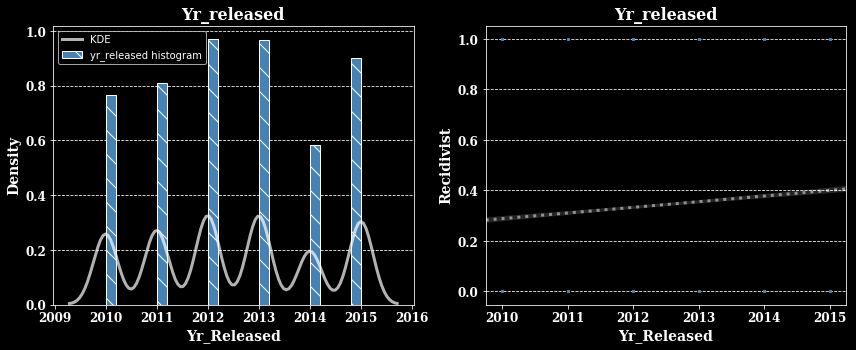

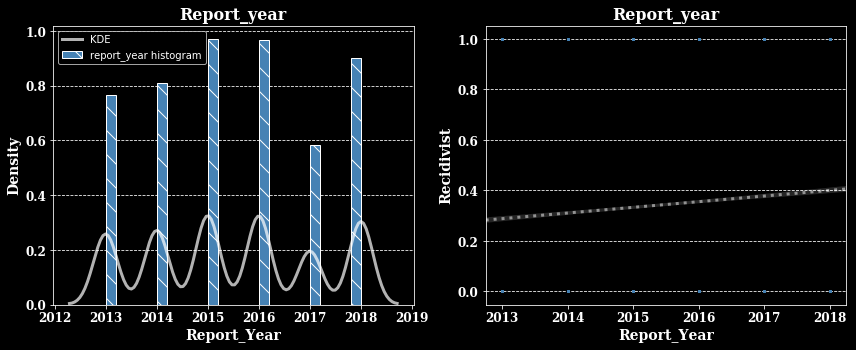

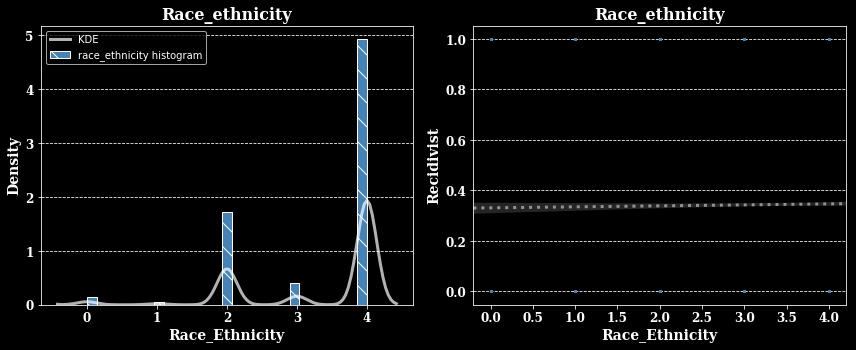

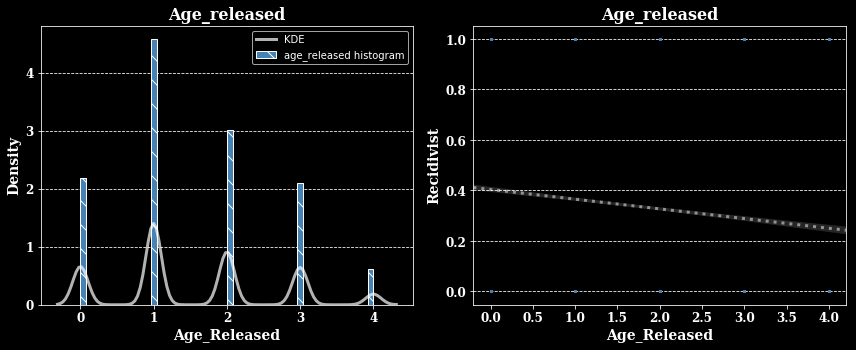

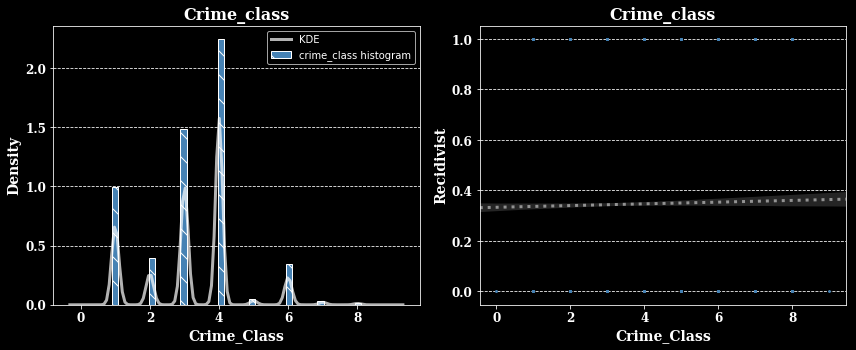

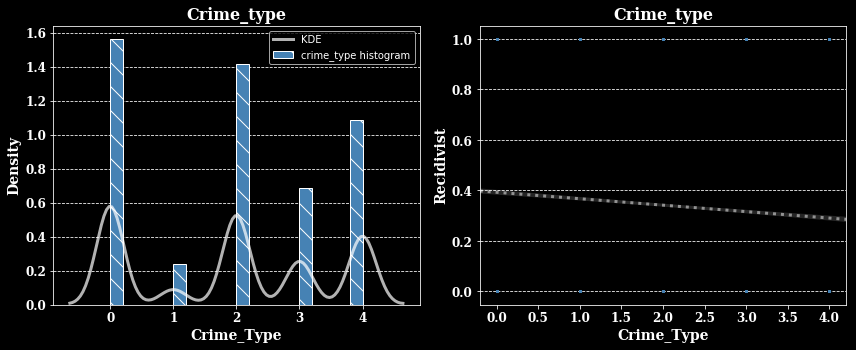

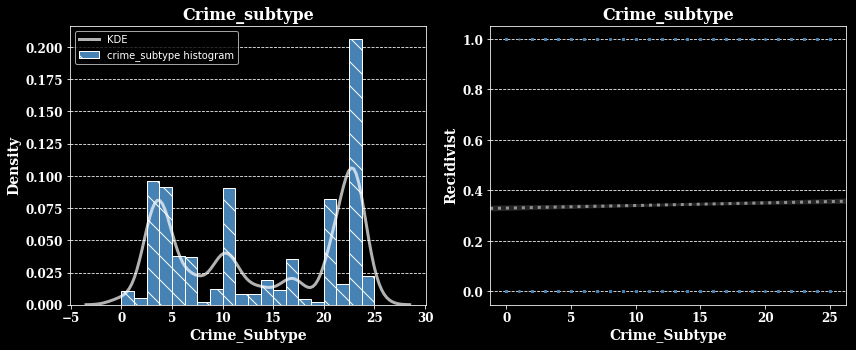

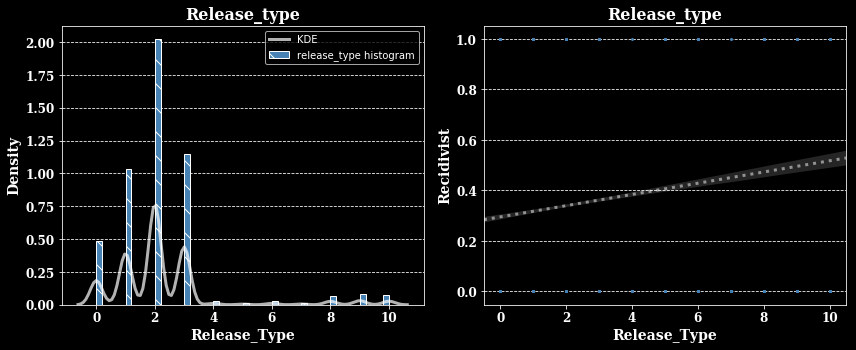

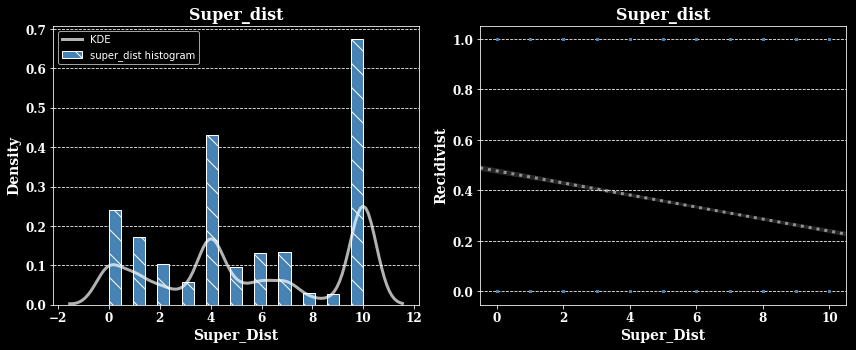

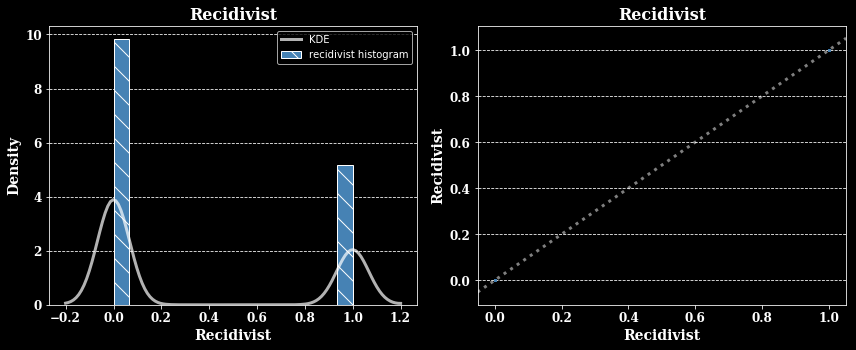

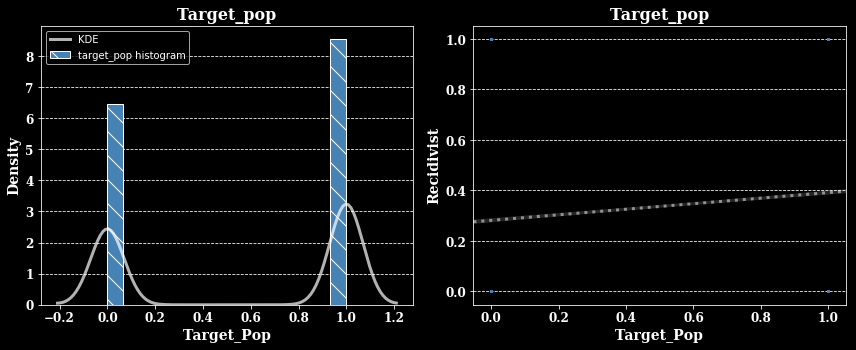

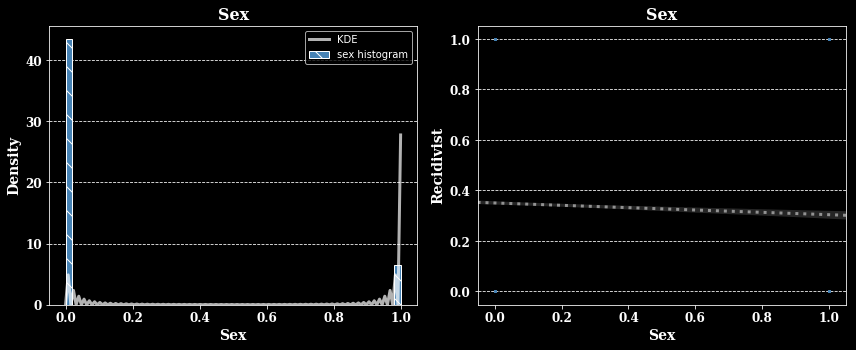

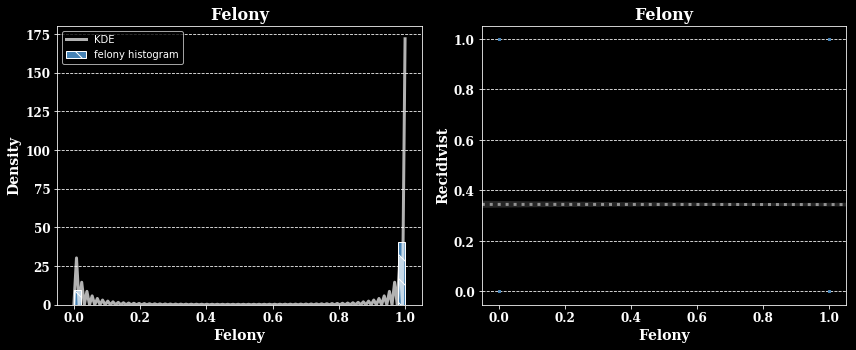

In [56]:
from bs_ds.bamboo import plot_hist_scat
plot_hist_scat(df_code,'recidivist')

(<Figure size 1152x1152 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a05e0d2630>)

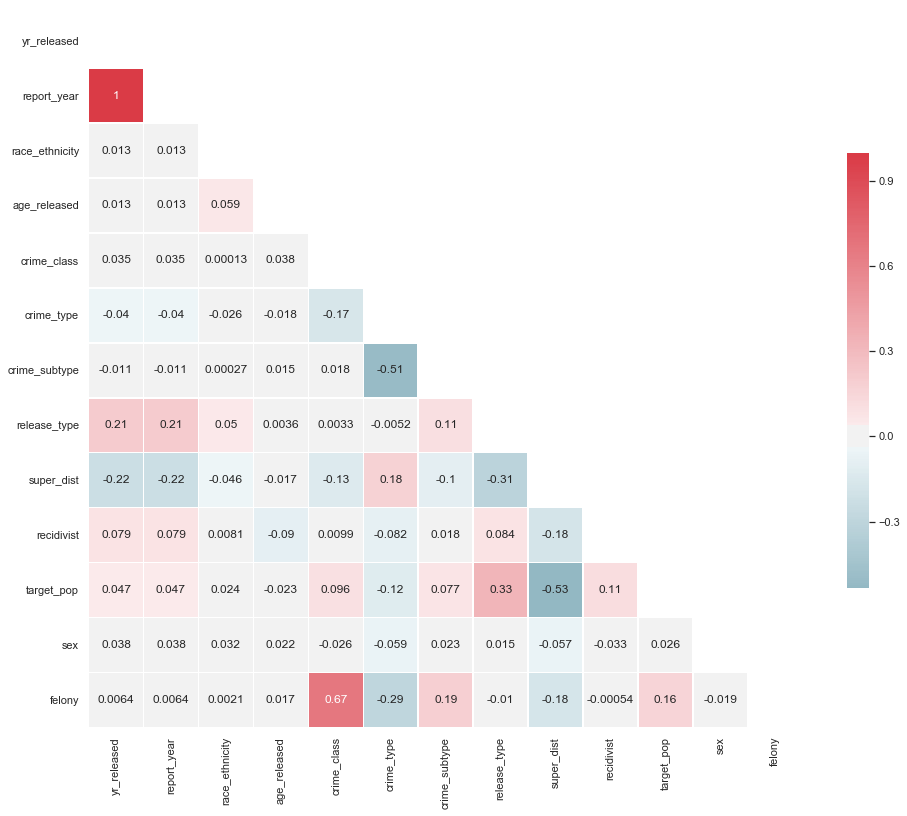

In [57]:
from bs_ds.bamboo import multiplot
multiplot(df_code.)

## Comments on Data 

- Everything looks good to go with the possible exception of recivisidm_year. 
- Keeping for now. 

# Preprocessing for Modeling

In [58]:
inspect_df(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24206 entries, 0 to 26019
Data columns (total 13 columns):
yr_released       24206 non-null int64
report_year       24206 non-null int64
race_ethnicity    24206 non-null object
age_released      24206 non-null int64
crime_class       24206 non-null object
crime_type        24206 non-null object
crime_subtype     24206 non-null object
release_type      24206 non-null object
super_dist        24206 non-null object
recidivist        24206 non-null int64
target_pop        24206 non-null int64
sex               24206 non-null int64
felony            24206 non-null bool
dtypes: bool(1), int64(6), object(6)
memory usage: 2.4+ MB


None

,yr_released,report_year,age_released,recidivist,target_pop,sex
count,24206.0000,24206.0000,24206.0000,24206.000,24206.0000,24206.0000
mean,2012.4997,2015.4997,1.5499,0.344,0.5701,0.1311
std,1.6764,1.6764,1.1075,0.475,0.4951,0.3375
min,2010.0000,2013.0000,0.0000,0.000,0.0000,0.0000
25%,2011.0000,2014.0000,1.0000,0.000,0.0000,0.0000
50%,2012.0000,2015.0000,1.0000,0.000,1.0000,0.0000
75%,2014.0000,2017.0000,2.0000,1.000,1.0000,0.0000
max,2015.0000,2018.0000,4.0000,1.000,1.0000,1.0000



---------------------------------------------------

# of Identified Numeric Values in "Object" columns:


,Numeric values,Total Values,Percent
Column,,,



----------------------------

# of Identified Null Values:


,Null values,Total Values,Percent
Column,,,
yr_released,0,24206,0.0
report_year,0,24206,0.0
race_ethnicity,0,24206,0.0
age_released,0,24206,0.0
crime_class,0,24206,0.0
crime_type,0,24206,0.0
crime_subtype,0,24206,0.0
release_type,0,24206,0.0
super_dist,0,24206,0.0


,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex,felony
0,2010,2013,Black,1,C Felony,Violent,Robbery,Parole,7JD,1,1,0,True
1,2010,2013,White,1,D Felony,Property,Theft,Discharged – End of Sentence,unknown,1,0,0,True
2,2010,2013,White,2,B Felony,Drug,Trafficking,Parole,5JD,1,1,0,True


In [59]:
X = pd.get_dummies(df.drop(['recidivist','report_year','yr_released'],axis=1),drop_first=True)
y = df.recidivist

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24206 entries, 0 to 26019
Data columns (total 66 columns):
age_released                                            24206 non-null int64
target_pop                                              24206 non-null int64
sex                                                     24206 non-null int64
felony                                                  24206 non-null bool
race_ethnicity_Asian or Pacific Islander                24206 non-null uint8
race_ethnicity_Black                                    24206 non-null uint8
race_ethnicity_Hispanic                                 24206 non-null uint8
race_ethnicity_White                                    24206 non-null uint8
crime_class_Aggravated Misdemeanor                      24206 non-null uint8
crime_class_B Felony                                    24206 non-null uint8
crime_class_C Felony                                    24206 non-null uint8
crime_class_D Felony                         

In [61]:
df_code = []

In [62]:
from bs_ds.bs_ds import scale_data, thick_pipe, compare_pipes, make_config_dict,make_random_config_dict

## Using bs_ds.bs_ds.thick_pipe 
1. Try scaling the features with different scalers for improves results
2. Use highest score to determine which models to try first.
2B. Test parameters compare_pipes using search = 'random', get best estimators from it
- When find the best parameters, use those to zero in on a smaller range to test again with compare pipes with smaller ranges of parameters
- Some of the models that are more computatinally intensive that may want to be tested in small batches or 1 at a time:
    - LogRegCV, XGB, GradBoost, AdaBoost

In [63]:
# X.to_csv('X_one_hot.csv')

In [64]:
# y.to_csv('y_recidivist.csv')

In [65]:
n_comp = X.shape[1]-1

In [66]:
# bookmark

In [67]:
pipe_res = thick_pipe(X,y,n_comp,verbose=False);
# pipe_res = thick_pipe(X,y,verbose=False);

,classifier,score
0,LogReg,0.6733
1,SVC,0.6702
2,DecTree,0.6314
3,RandFor,0.6418
4,AdaBoost,0.6745
5,GradBoost,0.6829
6,xgb,0.6809


- Notes on thick pipe run # 1(ish)
    - Very similar results for most models(except dectree, randomfor)
    - Best score is 0.0.68 gradboost
- Notes on run # 2 (one-hot encoded everything but years and target)
    - Basically same performance, but xgb eeks out .6782
    
| ---- | ---- | ---- |
|0	LogReg: 0.6779|,1	SVC:	0.6698, 2	DecTree:	0.6318, 3	RandFor:	0.6391, 4	AdaBoost:	0.6697, 5	GradBoost:	0.6780, 6	xgb	0.6782

## Baseline Classifier


### Catboost

In [68]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

In [86]:
df=pd.read_csv('recidivism_remapped_classes.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df_cat = df.filter(regex='map',axis=1)
df_cat.head()

,crime_class_map,race_ethnicity_map,release_type_map,recidivist_map,target_pop_map,sex_map,age_released_map
0,C Felony,Black,Paroled,1,1,0,1
1,D Felony,White,Discharged - End of Sentence,1,0,0,1
2,B Felony,White,Paroled,1,1,0,2
3,B Felony,White,Paroled,0,1,0,1
4,D Felony,Black,Discharged - End of Sentence,1,0,0,2


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [72]:
catboost_pool = Pool(X_train, y_train)

In [73]:
model = CatBoostClassifier(iterations=3,
                          depth=4,
                          learning_rate = 1,
                          loss_function = 'CrossEntropy',
                          verbose=True,
                          task_type="GPU")

In [74]:
# model.fit(X_train, y_train)
model.fit(catboost_pool)

0:	learn: 0.6203738	total: 36ms	remaining: 72.1ms
1:	learn: 0.6098563	total: 73.9ms	remaining: 37ms
2:	learn: 0.6056246	total: 108ms	remaining: 0us


In [ ]:
# import pickle
# filename = 'pickles/cat_boost.pickle'
# pickling_on = open(filename,'wb')
# pickle.dump(model,pickling_on)
# pickling_on.close()

In [ ]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

print("class = ", preds_class)
print("proba = ", preds_proba)

### Simple Decision Tree Classifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier()

In [ ]:
# params={'max_depth':10}
# tree_clf.set_params(**params)

In [ ]:
# tree_clf.fit(X_train, y_train)

In [76]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [ ]:
# clf_tree.

In [ ]:
# plot_feature_importances(tree_clf)

In [ ]:
# from bs_ds.bs_ds import viz_tree
# viz_tree(tree_clf)


### Assessing Model Accuracy

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# pred = tree_clf.predict(X_test)
# print(confusion_matrix(y_test,pred))
# print(classification_report(y_test, pred))
# print(accuracy_score(y_test,pred))

In [ ]:
# tree_clf.score(X_test, y_test)

## Bagged Trees

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import  DecisionTreeClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini',max_depth=5), n_estimators=20, n_jobs=-1, bootstrap_features=True)

In [79]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [80]:
bagged_tree.score(X_train,y_train)

0.6594139032720062

In [81]:
y_pred = bagged_tree.predict(X_test)
bagged_tree.score(X_test, y_test)

0.6535029742233972

In [ ]:
stop

In [ ]:
from bs_ds.bs_ds import *

In [ ]:
# from bs_ds.bs_ds import tune_params_trees
config_dict = make_random_config_dict()
compare_pipes(X_train,y_train,X_test,y_test,config_dict)


## Random Forests

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.657375784950975
0.6520158625247852


## Adding xgb, gbc

In [ ]:
import os
import sys
sys.path.append('C:\\Program\ Files\ \(x86\)\\Graphviz2.38\\bin')

In [ ]:
clf_xgb = xgboost.sklearn.XGBClassifier()
clf_gbc = GradientBoostingClassifier()

In [ ]:
clf_gbc.fit()

In [ ]:
plot_feature_importances(tree_clf)